In [51]:
import numpy as np                 
import matplotlib.pyplot as plt    
import random                      

from keras.datasets import mnist, fashion_mnist, cifar10, cifar100
from keras.models import Sequential
import tensorflow as tf
import keras
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils                        

In [52]:
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

169017344/169001437 [==============================] - 3s 0us/step
X_train shape (50000, 32, 32, 3)
y_train shape (50000, 1)
X_test shape (10000, 32, 32, 3)
y_test shape (10000, 1)


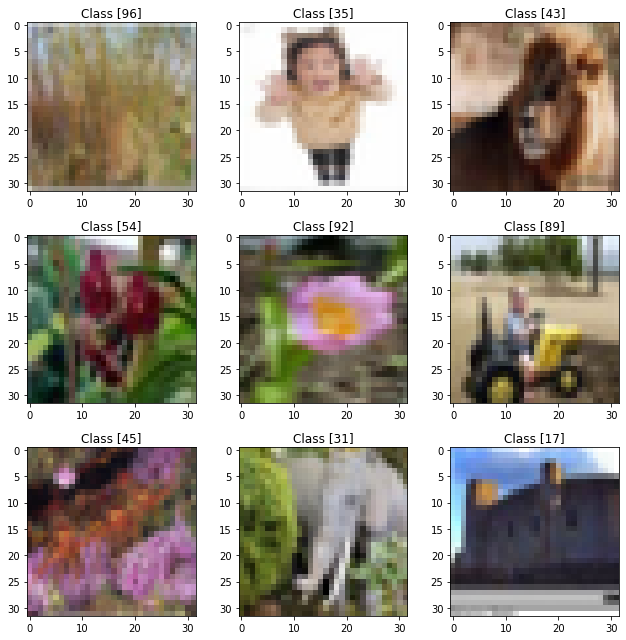

In [53]:
plt.rcParams['figure.figsize'] = (9,9) 

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
    
plt.tight_layout()

In [54]:
# X_train = X_train.reshape(60000, 784) 
# X_test = X_test.reshape(10000, 784)   

X_train = X_train.astype('float32')   
X_test = X_test.astype('float32')

X_train /= 255                        
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (50000, 32, 32, 3)
Testing matrix shape (10000, 32, 32, 3)


In [55]:
nb_classes = 100 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
print()

In [56]:
# The Sequential model is a linear stack of layers and is very common.
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same', input_shape=(32,32,3)))
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer = 'he_uniform', padding = 'same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(Y_train.shape[1],activation='softmax'))
model.summary()


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 16, 16, 32)        0         
                                                                 
 conv2d_26 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 8, 8, 64)         0         
 g2D)                                                 

In [57]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

hist = model.fit(X_train, Y_train,
          batch_size=128, epochs=20, validation_split=0.2,
          verbose=1)

Epoch 1/20
313/313 [==============================] - 4s 11ms/step - loss: 4.6079 - accuracy: 0.0088 - val_loss: 4.6060 - val_accuracy: 0.0077
Epoch 2/20
313/313 [==============================] - 3s 11ms/step - loss: 4.6054 - accuracy: 0.0098 - val_loss: 4.6065 - val_accuracy: 0.0077
Epoch 3/20
313/313 [==============================] - 3s 10ms/step - loss: 4.6053 - accuracy: 0.0098 - val_loss: 4.6070 - val_accuracy: 0.0077
Epoch 4/20
313/313 [==============================] - 3s 11ms/step - loss: 4.6053 - accuracy: 0.0104 - val_loss: 4.6072 - val_accuracy: 0.0077
Epoch 5/20
313/313 [==============================] - 3s 10ms/step - loss: 4.6053 - accuracy: 0.0098 - val_loss: 4.6074 - val_accuracy: 0.0077
Epoch 6/20
313/313 [==============================] - 3s 10ms/step - loss: 4.6053 - accuracy: 0.0098 - val_loss: 4.6076 - val_accuracy: 0.0077
Epoch 7/20
313/313 [==============================] - 3s 10ms/step - loss: 4.6053 - accuracy: 0.0106 - val_loss: 4.6077 - val_accuracy: 0.0077

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


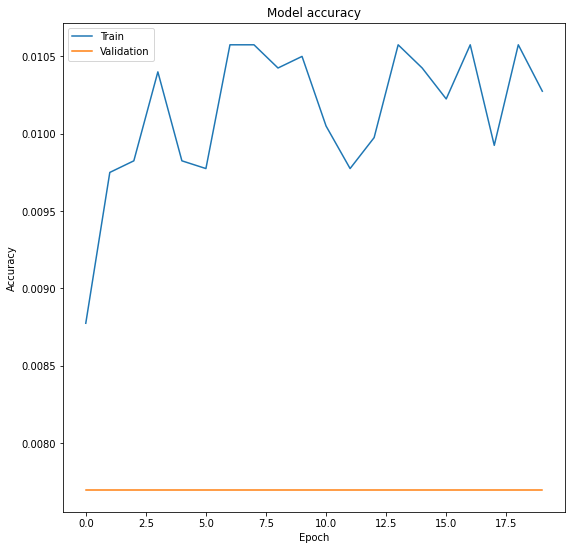

In [58]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper_left')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


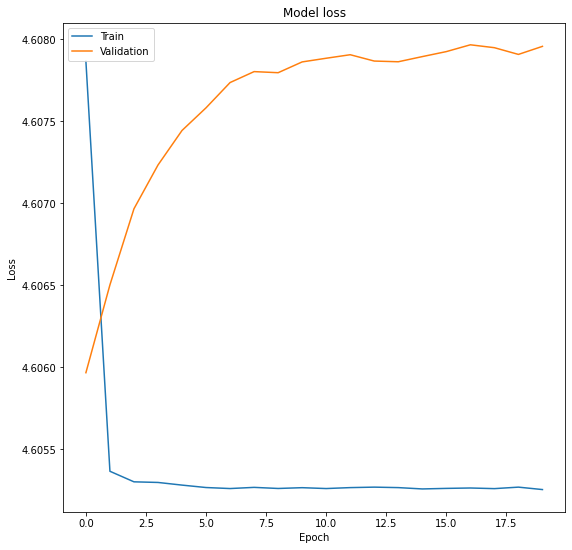

In [59]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper_left')
plt.show()